In [1]:
using EnvelopeApproximation
using EnvelopeApproximation.BubbleBasics
using EnvelopeApproximation.BubblesIntegration
using EnvelopeApproximation.StressEnergyTensor
import LinearAlgebra: norm
import Meshes: coordinates
using Plots

Point3 = EnvelopeApproximation.Point3


Point3 (alias for Meshes.Point{3, Float64})

# Setting up the bubbles

In [2]:
d = 1.
ΔV = 1.
ηs = LinRange(0.5, 15, 100)
bubbless = bubbless = [Bubbles([Bubble(Point3(0., 0., -d / 2) , η), Bubble(Point3(0., 0., d / 2), η)]) for η in ηs]
bubbless

100-element Vector{Bubbles}:
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 0.5), Bubble(Point(0.0, 0.0, 0.5), 0.5)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 0.6464646464646465), Bubble(Point(0.0, 0.0, 0.5), 0.6464646464646465)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 0.7929292929292929), Bubble(Point(0.0, 0.0, 0.5), 0.7929292929292929)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 0.9393939393939394), Bubble(Point(0.0, 0.0, 0.5), 0.9393939393939394)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.0858585858585859), Bubble(Point(0.0, 0.0, 0.5), 1.0858585858585859)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.2323232323232323), Bubble(Point(0.0, 0.0, 0.5), 1.2323232323232323)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.378787878787879), Bubble(Point(0.0, 0.0, 0.5), 1.378787878787879)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.525252525252525), Bubble(Point(0.0, 0.0, 0.5), 1.525252525252525)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.6717171717171

# Setting up the Ks

In [3]:
k_vecs = [Point3(0., 1., 1.)]
norm(p:: Point3) = norm(coordinates(p), 2)

norm (generic function with 23 methods)

In [4]:
k_vecs

1-element Vector{Meshes.Point3}:
 Point(0.0, 1.0, 1.0)

# Computing Numerically

In [5]:
tensor_directions = [(:x, :x), (:y, :y), (:z, :z)]
T_ij = EnvelopeApproximation.StressEnergyTensor.T_ij
numerical_T_ij = [T_ij(k_vecs, bubbles, 100, 100, ΔV,  tensor_directions; rtol=1e-3) for bubbles in bubbless]

100-element Vector{Dict{Union{Symbol, Tuple{Vararg{Symbol, N}}} where N, Union{Vector{ComplexF64}, Vector{Meshes.Point3}}}}:
 Dict((:z, :z) => ComplexF64[1.1503763497338775 + 2.1521955224923506e-15im], :k => Meshes.Point3[Point(0.0, 1.0, 1.0)], (:y, :y) => ComplexF64[1.1503763497338766 + 2.028604848378344e-15im], (:x, :x) => ComplexF64[1.165153570002993 + 2.216267423963271e-15im])
 Dict((:z, :z) => ComplexF64[2.1108000168209573 + 2.760297415985158e-15im], :k => Meshes.Point3[Point(0.0, 1.0, 1.0)], (:y, :y) => ComplexF64[2.280062577864385 + 2.1632320164471684e-15im], (:x, :x) => ComplexF64[2.3314756388987723 + 2.659239609114142e-15im])
 Dict((:z, :z) => ComplexF64[3.3248059140935755 + 4.3710288210110915e-15im], :k => Meshes.Point3[Point(0.0, 1.0, 1.0)], (:y, :y) => ComplexF64[3.700784249874608 + 3.0331609057443175e-15im], (:x, :x) => ComplexF64[3.833658752846226 + 4.1548245082573786e-15im])
 Dict((:z, :z) => ComplexF64[4.714987827285356 + 3.0843925503953873e-15im], :k => Meshes.Point3[P

# Z Z

In [6]:
T_xx = [d[(:x, :x)][1] for d in numerical_T_ij]  .|> real
T_yy = [d[(:y, :y)][1] for d in numerical_T_ij]  .|> real
T_zz = [d[(:z, :z)][1] for d in numerical_T_ij]  .|> real

100-element Vector{Float64}:
   1.1503763497338775
   2.1108000168209573
   3.3248059140935755
   4.714987827285356
   6.1570391098031
   7.54045423966908
   8.761599971216931
   9.567284701710058
   9.992614525371007
   9.762294655513319
   ⋮
 242.29448825191685
 278.1090403578314
 302.82917956484664
 314.8885502538601
 313.2398616266264
 297.4235431473071
 267.61020930425457
 224.6162361311164
 169.8898532518042

In [7]:
T_zz

100-element Vector{Float64}:
   1.1503763497338775
   2.1108000168209573
   3.3248059140935755
   4.714987827285356
   6.1570391098031
   7.54045423966908
   8.761599971216931
   9.567284701710058
   9.992614525371007
   9.762294655513319
   ⋮
 242.29448825191685
 278.1090403578314
 302.82917956484664
 314.8885502538601
 313.2398616266264
 297.4235431473071
 267.61020930425457
 224.6162361311164
 169.8898532518042

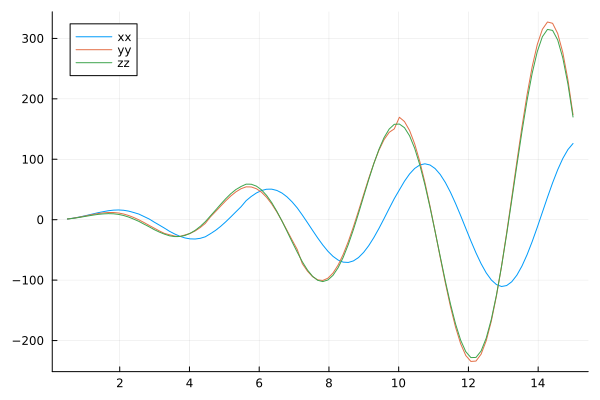

"/home/ben/.julia/dev/EnvelopeApproximation/scripts/benchmarks/comparison_to_Maya/varying_eta_constant_k.png"

In [8]:
p = plot(ηs, T_xx, label="xx")
plot!(ηs, T_yy, label="yy")
plot!(ηs, T_zz, label="zz")
display(p)
savefig("varying_eta_constant_k.png")

# Saving the data

In [9]:
import Meshes: coordinates
k = k_vecs[1] |> coordinates |> collect

3-element Vector{Float64}:
 0.0
 1.0
 1.0

In [10]:
data = Dict("eta" => ηs, "T_xx" => T_xx, "T_yy" => T_yy, "T_zz" => T_zz, 
            "d" => d, "k" => k)

Dict{String, Any} with 6 entries:
  "T_zz" => [1.15038, 2.1108, 3.32481, 4.71499, 6.15704, 7.54045, 8.7616, 9.567…
  "T_xx" => [1.16515, 2.33148, 3.83366, 5.61027, 7.54649, 9.54848, 11.5471, 13.…
  "k"    => [0.0, 1.0, 1.0]
  "eta"  => LinRange{Float64}(0.5, 15.0, 100)
  "T_yy" => [1.15038, 2.28006, 3.70078, 5.32716, 7.02103, 8.66367, 10.1542, 11.…
  "d"    => 1.0

In [11]:
using JSON

filename = "varying_eta_constant_k_data.json"

# Save the JSON string to a file
open(filename, "w") do file
    write(file, JSON.json(data))
end

println("Data saved to $filename")

Data saved to varying_eta_constant_k_data.json
